### 1. Importing Libraries

In [2]:
# importing libraries for data manipulation and analysis
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing crucial libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
# using warnings library for a clearner output
import warnings
warnings.filterwarnings('ignore')

##### Decided to install all the libraries upfront to avoid any potentiol problems while running the notebook. 
<div style="margin-bottom: 50px;"></div>

### 2. Exploratory Data Analysis

#### 2.1 Summary Statistics for Numerical Features

In [6]:
# loading the adapted insuarance dataset
df = pd.read_csv('insurance-adapted.csv')

In [7]:
# displaying basic infomration about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


##### The above df.info() method indicates an overall overview of the dataset. it has 7 columns with 1338 non-null entries. It indicates that there are no missing values in the dataset. 
##### Continuous numerical types:- age, bmi, charges
##### Integer :- children,
##### categorical:- sex, smoker, region

In [9]:
# displaying the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [10]:
# finding the summery statistics for numerical columns
df.describe()

,age,bmi,children,charges
count,1318.000000,1338.000000,1338.000000,1338.000000
mean,39.216237,30.663397,1.094918,13270.422265
std,14.083151,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 2.2 Making sure if the dataset has any missing values

In [12]:
missing_values = df.isnull().sum
print(missing_values)
print(df.isnull().sum())

<bound method DataFrame.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>
age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64


#### 2.3 Visualizing the Distribution of charges

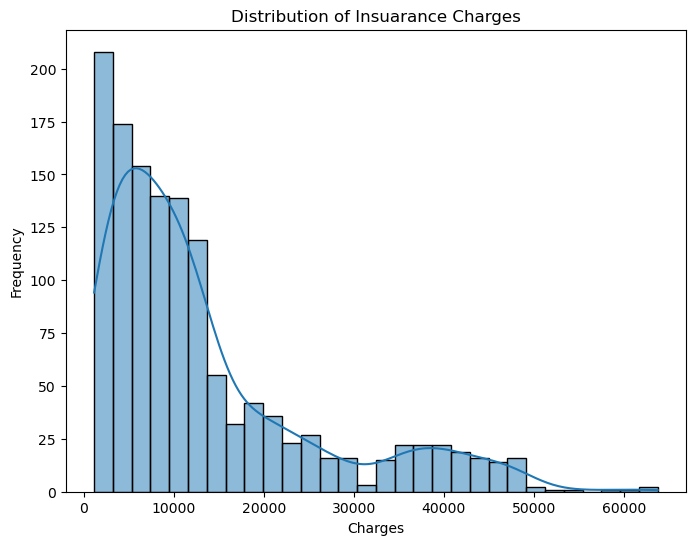

In [14]:
# since the target variable is 'charges', it is needed to understand its spread

# plotting the distribution of 'charges' to see its distribution shape and check
# if there are skewness or outliers.

plt.figure(figsize=(8,6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Insuarance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

##### It seems the histrogram of charges shows that the distribution is right-skewed. This means the majority of individuals have lower charges, while a small number have very high charges. This skewness of the target variable may affect the performance of certain models. 

#### 2.4 Encoding Categorical Variables

In [17]:
# Encoding categorical variebles like sex, smoker, and region using one-hot encoding
# to prepare for correlation analysis.

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Displaying the first few rows of the encoded dataset
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,False,True,False,False,True
1,18.0,33.770,1,1725.55230,True,False,False,True,False
2,28.0,33.000,3,4449.46200,True,False,False,True,False
3,33.0,22.705,0,21984.47061,True,False,True,False,False
4,32.0,28.880,0,3866.85520,True,False,True,False,False


#### 2.5 Correlation Analysis with a Heatmap

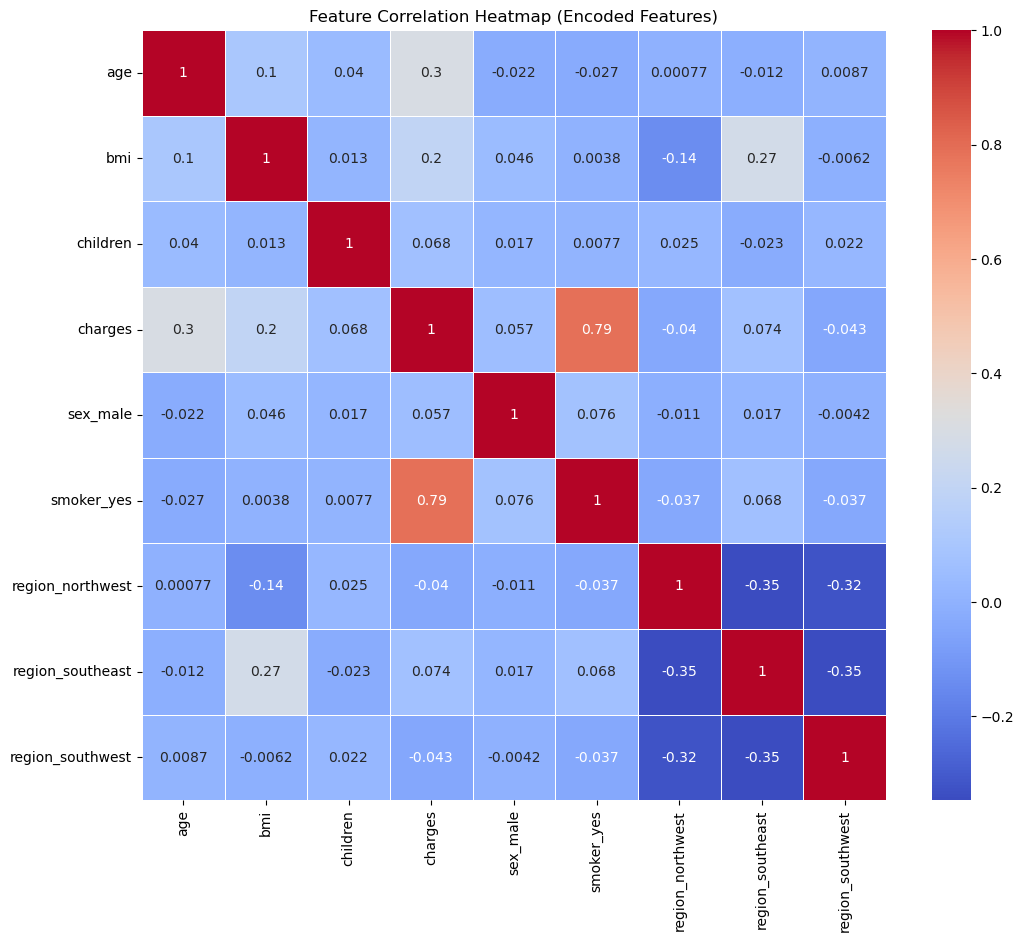

In [19]:
# plotting the correlation heatmap to understand the relationships between 
# numerical features 
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap (Encoded Features)')
plt.show()

##### The above correlation heatmap includes all features after encoding. It shows how features relate to each other numerically. It shows the smoker_yes shows a strong positive relation with charges which is our target variable. This indicates smokers typically bear higher insuarance charges. Therefore, it shows the importance of including the smoker feature as a key predictie feature

#### 2.6 Visualising and understanding charges by smoker status

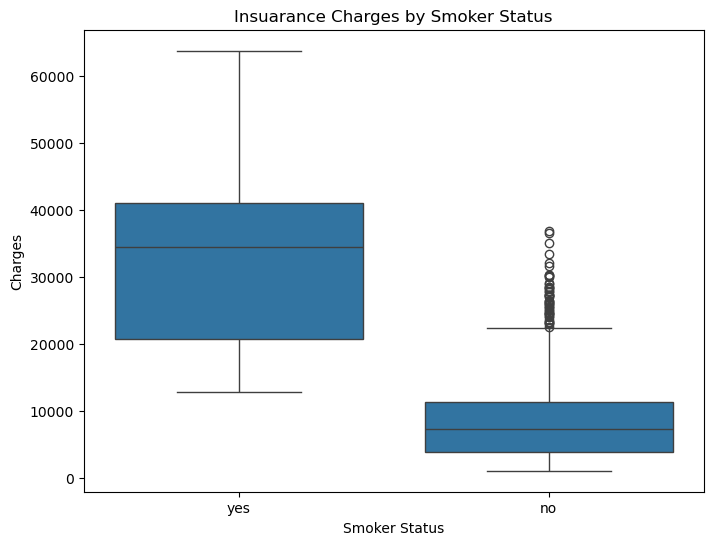

In [22]:
# using Box plot to compare charges between smokers and non-smokers
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insuarance Charges by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.show()

##### The Box plot clearly indicates that the charges for smokers are significantly higher than non-smokers

##### This indicates that smoker-status is a major determinant of insurance cost

##### The box plot also suggests that there are also more outliers for smokers. This means the variablity in charges is higher for smokers compared to non-smokers
<div style="margin-bottom: 50px;"></div>

### 3. Feature Engineering and Preprocessing

#### 3.1 Feature Engineering

In [26]:
# Creating an interaction feature between 'bmi' and smoker_yes' to capture 
#combined health risk

df_encoded['bmi_smoker'] = df['bmi']*df_encoded['smoker_yes']

##### Created an interaction feature (bmi_smoker) that multiplies BMI by Smoker status. The idea is that people who have a high BMI and smoke likely have greater health risks, which means they may face higher insurance charges.

In [28]:
# creating polynomial features for age and bmi to capture non-linear relationships
df_encoded['age_squared'] = df['age']**2
df_encoded['bmi_squared'] = df['bmi']**2

##### Polynomial features like age_squareda and bmi_squared were created to identify potentiol non-linear relationshops between these features and charges. Non-linear features can improve model performance by enabling the model to fit more complex patterns

### 3.2 Preprocessing

In [31]:
# Initializing the scaler
scaler = StandardScaler()

# scaling numerical features
numerical_features = ['age', 'bmi', 'children', 'charges', 'bmi_smoker', 'age_squared', 'bmi_squared']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Displaying the first few rows of the scaled dataset
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_smoker,age_squared,bmi_squared
0,-1.436036,-0.453320,-0.908614,0.298584,False,True,False,False,True,1.699463,-1.219425,-0.513241
1,-1.507070,0.509621,-0.078767,-0.953689,True,False,False,True,False,-0.494516,-1.252237,0.420429
2,-0.796732,0.383307,1.580926,-0.728675,True,False,False,True,False,-0.494516,-0.844312,0.287826
3,-0.441563,-1.305531,-0.908614,0.719843,True,False,True,False,False,-0.494516,-0.573841,-1.191289
4,-0.512597,-0.292556,-0.908614,-0.776802,True,False,True,False,False,-0.494516,-0.631482,-0.369724


##### The StandardScaler was used to standardize all numerical features (age, bmi, children, charges and engineered features) 
##### Scaling features ensure the equal contribution of all features to the model training process while improving convergence for models that use Gradient-based optimization
<div style="margin-bottom: 50px;"></div>

### 4 Splitting the Dataset

#### 4.1 Train-Test Split

In [35]:
# Defining the features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Spliting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##### The train-test split divides the dataset here into two parts. 80% for training and 20% for testing. This let us to train the model on one part of the data and evaluate the model's performance on unseen data

#### 4.2 Baseline Linear Regression Model

In [38]:
# Initializing the Linear Regression Model
linear_model = LinearRegression()

In [39]:
from sklearn.impute import SimpleImputer
# Initializing the imputer
imputer = SimpleImputer(strategy='mean')

# Apply imputation to training and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

##### Even though we didn't see missing values in the beginning, transformation can sometimes introduce NaNs. These NaNs were handled by using SimpleImputer to replace NaN values with the mean of each column so the training and test datasets are clean.

In [41]:
# Train the model on the training data
linear_model.fit(X_train, y_train)

LinearRegression()

##### The Linear Regression Model was used as the baseline. This step is crucial to establish a reference point for performance. Then it can help to understand how the next advanced models going to use in this project might improve this baseline.
<div style="margin-bottom: 50px;"></div>

### 5.Evaluating Baseline Model

#### 5.1 Performance metrics for the Linear Regression Model

##### The performance will be evaluated with following metrics
- Mean Squard Error (MSE)
- R-squared (R²)
- Mean Absolute Error (MAE)

In [46]:
# Making prediction on the test set
y_pred = linear_model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# calculating R-squared
r2 = r2_score(y_test, y_pred)

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

#printing the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.1389453679583213
R-squared (R²): 0.868846344724206
Mean Absolute Error (MAE): 0.2246939901397017


##### The above metrics give a sense of how accurate the prediction are and how well the baseline model explains the variance in the target variable which is "charges". However, these values aren't sense to us as these are scaled values. These charges have mean of 0 and standard deviation of 1, the rescalling will be done after comparing the models

#### 5.2 Analysis of Baseline Linear Regression Model
According to the above results of the baseline model, the followings can be observed.

- **Mean Squared Error (MSE): 0.1389**

The MSE measures the average squared difference between the predicted values (y_pred) and the actual values(y_test). The valued mentioned above are scaled. Therefore, the MSE value is expressed in the scaled units of 'charges'. That means it is not directly intrepretable as a dollar amount. However, this Metric gives a useful insight evaluating different models. The lower the MSE, the better the performance. 

- **R-squared (R²): 0.8688**

This performance metric measures the proportion of variance in the target variable which is charges here that is explained by the model. Here it is R²=0.8688, means the Linear Regression Model explains about 87% of the variance in the insuarance charges. Eventhough this is a baseline model, 87% is a strong result as it captures a significunt portion of the underlying patterns in the data. Higher R² value means the model effective at predicting the target variable.

- **Mean Absolute Error (MAE): 0.2247**

The MAE represents the average absolute difference between the predicted and actual values. Similar to the MSE, the MAE is shown in the scaled units. This means it measures how far off the predictions are on average. As it suggests, the lower the MAE, the higher the performance of the model.

<div style="margin-bottom: 50px;"></div>

### 6. Advanced Model - Decision Tree

#### 6.1 Training a Dicision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
# Initializing the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Training the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

##### The Decision Tree Regressor model used to capture potentiol non-linear relationships in the data. Unlike Linear Regression, Decision Trees can model more complex relationships, and they do not require scaled data. 

#### 6.2 Evaluating the Decision Tree Model

##### Here also the performance will be evaluated with following metrics
- Mean Squard Error (MSE)
- R-squared (R²)
- Mean Absolute Error (MAE)

In [55]:
# Making prediction on the test data using the Decision Tree Model
y_pred_dt = dt_model.predict(X_test)

# Calculating Mean Squared Error for Decision Tree
mse_dt = mean_squared_error(y_test,y_pred_dt)

# Calculating R-squared for Decision Tree
r2_dt = r2_score(y_test,y_pred_dt)

# Calculating Mean Absolute Error for Decision Tree
mae_dt = mean_absolute_error(y_test,y_pred_dt)

# Printing the performance metrics for Decision Tree
print(f"Mean Squared Error (MSE) - Decision Tree: {mse_dt}")
print(f"R-squared (R²) - Decision Tree: {r2_dt}")
print(f"Mean Absolute Error (MAE) - Decision Tree: {mae_dt}")

Mean Squared Error (MSE) - Decision Tree: 0.23956255930139228
R-squared (R²) - Decision Tree: 0.7738715166882963
Mean Absolute Error (MAE) - Decision Tree: 0.2320425053662641


The above values indicates that the Decision Tree model has higher **MSE** and **MAE** compared to the baseline **Linear Regression**. This suggests that the model may not be generalizing well to the test data. 

- The R² of this output is 0.7739 which explains the Decision tree explains about 77% of the variance in the target variable (charges). However, this value is significantly lower compared to baseline Linear Regressions's R² of 0.8688. This clearly shows that the Decision Tree's current form isn't capturing the relationship effectively.
- Moreover, the high error values in the current form of the Decision Tree (both MSE and MAE) compared to the baseline model indicate that the Decision Tree might be **overfitting**. This is a common phenomenon when a tree is allowed to grow too deep and model the noise in the training data.

**Due to above reasons, the Hyperparameter Tuning is necessary**

In [57]:
# Initializing the Decision tree Regression with max_depth to control overfitting.
dt_model_tuned = DecisionTreeRegressor(max_depth=5, random_state=42)

# Training the model on the training data
dt_model_tuned.fit(X_train, y_train)

# Making predictions and evaluation.
y_pred_dt_tuned = dt_model_tuned.predict(X_test)

mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)
mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)

# Printing tuned performance metrics
print(f"Mean Squared Error (MSE) - Tuned Decision Tree: {mse_dt_tuned}")
print(f"R-squared (R²) - Tuned Decision Tree: {r2_dt_tuned}")
print(f"Mean Absolute Error (MAE) - Tuned Decision Tree: {mae_dt_tuned}")


Mean Squared Error (MSE) - Tuned Decision Tree: 0.15791989315784527
R-squared (R²) - Tuned Decision Tree: 0.8509358639819712
Mean Absolute Error (MAE) - Tuned Decision Tree: 0.2299608918538091


**Lets evaluate these outputs after the Hyperparameter Tuning**

Based on the outputs, here are the findings so far. 
- **Improvement, but still behind baseline model**
  - The hyperparameter tuned output performance metrics are better compared to the original Decision Tree Regressor
  - However, the **Decision Tree** didn't outperform the **Linear Regression** model.
    - The R² value of hyperparameter tuned model is 0.8509 which is still lower compared to Linear Regression's 0.8688. This indicates that the Decision Tree does not capture as much variance as the baseline model.
    - Also, both the MSE and MAE are still **higher** than those of Linear Regression
   


- **This can be due to the following reasons**
  - **Nature of the data:** This dataset may have underlying relationships that are better represented by a **linear model.** Decision Trees work well in capturing non-linear relationships in datasets, but the performance can be a problem when it comes to when the dataset has dominated linear relationships.
  - **Overfitting Despute Tuning:** Eventhough the Hyperparameter tuning was done, the model can be still be **overfitting** upto some extent, resulting in faling to generalize well to the test data

<div style="margin-bottom: 50px;"></div>

### 7. Advanced Model: Random Forest Regressor

#### 7.1: Train the Random Forest Regressor

In [61]:
# Initializing the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Training the Random Forest Regressor:** This Random Forest model was trained with 100 decision trees to capture complex relationships in the data. The Randome Forests are designed to reduce overfitting and provide better predictions by averaging over several models.  

#### 7.2: Evaluate the Random Forest Model

##### Same as earlier models the performance will be evaluated with following metrics
- Mean Squard Error (MSE)
- R-squared (R²)
- Mean Absolute Error (MAE)

In [65]:
# Making prediction on the test data using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculating the Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculating the R-squared 
r2_rf = r2_score(y_test,y_pred_rf)

# Calculating Mean Absolute Error 
mae_rf = mean_absolute_error(y_test,y_pred_rf)

# Printing the Performance metrics for Random Forest
print(f"Mean Squared Error (MSE) - Random Forest: {mse_rf}")
print(f"R-squared (R²) - Random Forest: {r2_rf}")
print(f"Mean Absolute Error (MAE) - Random Forest: {mae_rf}")

Mean Squared Error (MSE) - Random Forest: 0.1410825938501755
R-squared (R²) - Random Forest: 0.8668289691759197
Mean Absolute Error (MAE) - Random Forest: 0.21168812327357536


**Lets evaluate these performance metrics from Random Forest model**

Based on the findings above, here is the analysis

- **The Random Forest Regressor exhibits mixed performances.**
  - The **Random Forest** didn't significantly outperform the **tuned Decision Tree** or **Linear Regression**
  - The R² seems a bit lower compared to the other models. It indicates that the Random Forest didn't capture additional variance compared to other two evaluated models.
  - But, the **MAE** is the **lowers**. This indicates the Random Forest makes more precise predictions. (Means less error on average)

- **Explanations.**
  - The Random Forest is expected to perform well with data that usually has more noise or complex patterns by combining multiple decision trees, but in this case, the relatioships may be **inherently linear**. This can be **Linear Regression still performs well

**Since none of the advanced models tried were able to outperform the baseline model, it would be better to try one more model. :-) :) :-)**

### 8. Advanced Model: XGBoost Regressor

#### 8.1: Training the XGBoost Model

In [69]:
# importing the library
from xgboost import XGBRegressor
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

- **Parameters:**
  - n_estimators=100 means the number of boosting rounds. This also says that how many trees are included in the model
  - learning_rate=0.1 this controls the step size at each iteration while it moves towards a minimum of the loss function
  - max_depth=4 An excellent way to prevent overfitting by controlling the depth of each tree
  - random_state=42 this ensure reproducibility like previous models
- **Model complexity:**
  - **XGBoost** builds multiple decision trees in an **ensemble. This helps it capture complex patterns while reducing the overfitting issue. 

#### 8.2: Evaluating the XGBoost Model
##### Same as earlier models the performance will be evaluated with following metrics
- Mean Squard Error (MSE)
- R-squared (R²)
- Mean Absolute Error (MAE)

In [72]:
# Making predictions on the test data using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculating the evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Printing the performance metrics for XGBoost
print(f"Mean Squared Error (MSE) - XGBoost: {mse_xgb}")
print(f"R-squared (R²) - XGBoost: {r2_xgb}")
print(f"Mean Absolute Error (MAE) - XGBoost: {mae_xgb}")


Mean Squared Error (MSE) - XGBoost: 0.1316660894425225
R-squared (R²) - XGBoost: 0.8757174192993868
Mean Absolute Error (MAE) - XGBoost: 0.20332013424426842


**Let's evaluate this performance matrics of XGBoost**

Based on above data, the following can be observed

- **Mean Squared Error (MSE):**
  - The **MSE** for **XGBoost** is **0.1317**, which is the **lowest** among all the models analyzed so far.
- **R-squared(R²):**
  - The **R²** value is **0.8757**, which is **higher** than **Linear Regression**, **Random Forest**, and somewhat similar to **tuned Dicision Tree**. This indicates that **XGBoost** captures the variance in the target variable slightly better than other models.
- **Mean Absolute Error (MAE):**
  - The **MAE** is **0.2033**, which is the **lowest** among all models. This indicates that **XGBoost** model has been able to make precise predictions on average compared to other models.   